# 영화 리뷰 감정분석 경진대회 베이스라인

이번 대회는 주어진 문서를 통해 감정을 분류하는 대회입니다. 

감정의 긍정, 부정을 분류하는 간단한 대회 처럼 보이지만, 자연어 처리를 처음 접하는 분들에게는 어디부터 시작해야 하는지 막막하실 겁니다.

베이스라인을 통해 자연어 처리 기초에 입문해보세요!

# 데이터 불러오기
먼저 분석하려는 데이터를 작업장으로 가져오는 작업이 필요합니다.

이를 위해서 파이썬 라이브러리 중 하나인 Pandas를 이용합니다.

pandas 라이브러리는 엑셀과 같은 행과 열로 이루어진 테이블(table) 형식의 데이터를 편하게 다루도록 해주는 라이브러리입니다.

데이터 분석에는 반드시 사용된다고 해도 과언이 아닌 라이브러리이니, 시간이 날때마다 공부해둡시다.

In [1]:
#pip install scikit-learn
#pip install pandas

In [1]:
import pandas as pd 

#csv 형식의 training 데이터를 로드합니다.
data = pd.read_csv('./data/train.csv')

#데이터 살펴보기 위해 데이터 최상단의 5줄을 표시합니다.
data.head() 

,id,document,label
0,1,영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐,0
1,2,히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯...,1
2,3,괜찮은 음악영화가 또 나왔군요!!! 따뜻한 겨울이 될 것 같아요~,1
3,4,아무래도 20년도지난작품이라 지금보기는너무유치하다,0
4,5,지금까지의 영화들이 그랬듯. 이 영화역시 일본에 대한 미화는 여전하다.,0


## 결측치 확인

결측치(NA: Not Available)란 값이 누락된 데이터를 말합니다.

보다 정확한 분석을 하기 위해서는 데이터의 결측치를 확인하고 적절히 처리해주어야 합니다.

이번 데이터에 결측치가 있나 확인해볼까요?

In [3]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(data)

결측치가 존재하지 않습니다


이제 본격적으로 모델을 설계하기 위해 데이터를 문서와 label 로 나누어 줍니다

In [2]:
X = data.document #training 데이터에서 문서 추출
y = data.label #training 데이터에서 라벨 추출

In [5]:
X.head() #데이터 살펴보기

0                  영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐
1               히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯...
2       괜찮은 음악영화가 또 나왔군요!!! 따뜻한 겨울이 될 것 같아요~
3                아무래도 20년도지난작품이라 지금보기는너무유치하다
4    지금까지의 영화들이 그랬듯. 이 영화역시 일본에 대한 미화는 여전하다.
Name: document, dtype: object

In [6]:
y.head() #데이터 살펴보기

0    0
1    1
2    1
3    0
4    0
Name: label, dtype: int64

# CountVectorizer 의 이해

컴퓨터는 문장(텍스트)을 계산할 수 없습니다. 

컴퓨터가 계산을 하기 위해서는 먼저 문장을 숫자로 바꾼 다음 계산하도록 해야 합니다. 

이것을 워드 임베딩(word embedding)이라고 합니다.

이번 베이스라인에서는 CountVectorizer 기법을 사용해 문장을 숫자로 표현해보겠습니다.

CountVectorizer 는 입력된 문장을 토큰화(Tokenize)하여 토큰의 등장 빈도 벡터로 바꿔주는 기법입니다. 

토큰화란 문장를 의미가 있는 최소의 단위로 쪼개는 것을 의미합니다.

예를 들어 "hello, I am a data scientist!" 라는 문장을 띄어쓰기 기준으로 토큰화 시키면 

"hello", ",", "I", "am", "a", "data", "scientist", "!" 라는 8개의 토큰으로 토큰화 됩니다.

토큰화를 하는 방식은 여러가지가 있지만 이번 베이스라인에서는 띄어쓰기를 기준으로 토큰화를 진행해보겠습니다.

CountVectorizer 사용을 위해 sklearn 패키지에 있는 CountVectorizer 를 불러옵니다.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer #sklearn 패키지의 CountVectorizer import

sample_vectorizer = CountVectorizer() #객체 생성

이제 CounterVectorizer 를 학습 시켜주어야 합니다. 

어떠한 단어들을 사용할 지, 어떠한 단어가 중요도를 가지는지 학습하는 과정입니다.

CountVectorizer 의 경우 단어의 출현 빈도를 기준으로 문장을 벡터(=숫자의 집합)로 바꿔줍니다.

In [4]:
sample_text1 = ["hello, my name is dacon and I am a data scientist!"]

sample_vectorizer.fit(sample_text1) #CountVectorizer 학습

CountVectorizer()

이제 학습이 완료되었습니다. 

먼저 sample_vectorizer 가 학습한 단어 목록을 확인해보겠습니다.

이를 Vocabulary라고 하며, 앞으로 sample_vectorizer는 이 Vocab을 기준으로 새로운 문장을 숫자로 바꿔줄 것입니다.

In [5]:
print(sample_vectorizer.vocabulary_) # Vocabulary

{'hello': 4, 'my': 6, 'name': 7, 'is': 5, 'dacon': 2, 'and': 1, 'am': 0, 'data': 3, 'scientist': 8}


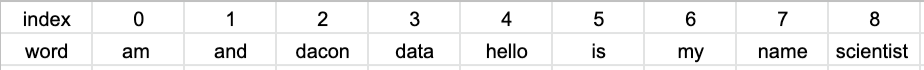

In [11]:
#from IPython.display import Image
#Image("./image.png") 

"hello, my name is dacon and I am a data scientist" 문장으로 vectorizer 를 학습 시켰습니다. 

sklearn의 CountVectorizer는 "I", "a" 와 같이 길이가 2 이하인 단어들과, ",", !" 같은 특수 문자를 의미가 적다고 판단하여 제외시킵니다.

그래서 최종적으로는 9개의 단어들이 Vocab 에 포함되어있습니다. 

그럼 이제 다른 문장을 sample_vectorizer 를 활용해 벡터로 transform 해볼까요?

In [12]:
sample_text2 = ["you are learning dacon data science"]

sample_vector = sample_vectorizer.transform(sample_text2)
print(sample_vector.toarray())

[[0 0 1 1 0 0 0 0 0]]


"you are learning dacon data science" 문장을 sample_vectorizer 를 활용해 transform 해보았습니다.
 
단어들의 출현 빈도로 이루어진 크기 9의 백터가 출력되었습니다. 이 벡터를 BoW 라고 합니다.

BoW 란 "Bag of Words" 의 약자로 CountVectorizer 로 변환된 단어의 집합을 말합니다

sample_text2 문장 내에는 "dacon", "data" 단어가 각 1번 씩 출현했습니다. 

따라서 "dacon" 과 "data" 에 해당하는 인덱스의 값이 1로 표시되어 있고, 등장하지 않은 단어들은 0으로 표시되어 있습니다.

In [13]:
sample_text3 = ["you are learning dacon data science with movie data"]

sample_vector2 = sample_vectorizer.transform(sample_text3)
print(sample_vector2.toarray())

[[0 0 1 2 0 0 0 0 0]]


"you are learning dacon data science with movie data" 문장에는 "dacon" 단어가 1번, "data" 단어가 2번 출현했습니다.

따라서 "dacon" 단어에 해당하는 인덱스에는 1의 값이, "data" 에 해당하는 인덱스에는 2의 값이 할당되었습니다. 

CountVectorizer 는 위와 같이 작동합니다.

이해를 위해 CountVectorizer 를 하나의 문장을 사용해 학습 시켰기에 생성된 Vocab과 BoW 의 크기는 모두 9 였습니다. 

하지만 더 큰 데이터를 사용해 CountVectorizer 를 학습시킨다면 Vocab과 Bow 의 크기는 더욱 증가할 것입니다. 

그럼 이제 영화 리뷰 데이터를 분석해볼까요?

# 영화 리뷰 데이터

먼저 새로운 객체를 생성하여 CountVectorizer 를 할당해 줍니다. 

다음 미리 준비해두었던 데이터를 사용해 CountVectorizer 를 학습 시켜줍니다.

In [14]:
vectorizer = CountVectorizer() #countvectorizer 생성
vectorizer.fit(X) # countvectorizer 학습
X = vectorizer.transform(X) # transform

이제 CountVectorizer 를 학습 시켰습니다. 

X 는 이제 자연어가 아닌 숫자, 백터 데이터로 이루어져 있습니다.

이제는 머신러닝 모델의 input 값으로 적절한 데이터의 형식을 갖춘 것입니다!

## Logistic Regression

분류 문제에 많이 사용되는 LogisticRegression 모델을 사용하여 리뷰들의 감정을 분류해보았습니다.

In [15]:
from sklearn.linear_model import LogisticRegression #모델 불러오기
model = LogisticRegression() #객체에 모델 할당
model.fit(X, y) #모델 학습

LogisticRegression()

이제 모델 학습이 완료되었습니다!

모델이 잘 학습되었는지 직접 문장을 입력해서 확인해 볼까요?

In [16]:
#run model
X_pred = vectorizer.transform(["영화 완전 꿀잼"]) 
y_pred = model.predict(X_pred)
print(y_pred)
#0:negative 1:positive

[1]


모델이 잘 학습되었음을 확인했습니다.

여러분들도 원하는 문장으로 모델을 테스트해 보세요!

# Dacon 대회 제출

이제 test 데이터를 예측해 제출 파일을 생성해 봅시다.

In [17]:
test = pd.read_csv("./test.csv") #파일 읽기
test.head() #파일 확인

,id,document
0,1,시간 때우기 좋은 영화 지루함
1,2,훈훈한 정이 느껴지는 영화! 가족끼리 드라마 보듯이 보면 딱~!
2,3,Childhood fantasy
3,4,멋있는 영화입니다. 잊을 수 없는!
4,5,너무 감동적이네요 펑펑 울었습니다


이제 test 데이터를 transform 합니다. 그 후 test 데이터의 label 을 예측합니다.

In [18]:
test_X = test.document #문서 데이터 생성

test_X_vect = vectorizer.transform(test_X) #문서 데이터 transform 
#test 데이터를 대상으로 fit_transform 메소드를 실행하는 것은 test 데이터를 활용해 vectorizer 를 학습 시키는 것으롤 data leakage 에 해당합니다.

pred = model.predict(test_X_vect) #test 데이터 예측
print(pred)

[0 1 0 ... 1 0 0]


In [19]:
submission = pd.read_csv("./sample_submission.csv") #제출용 파일 불러오기
submission.head() #제출 파일이 잘 생성되었는지 확인

,id,label
0,1,0
1,2,1
2,3,0
3,4,1
4,5,1


In [20]:
submission["label"] = pred #예측 값 넣어주기
submission.head() # 데이터가 잘 들어갔는지 확인합니다.

,id,label
0,1,0
1,2,1
2,3,0
3,4,1
4,5,1


In [21]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
submission.to_csv("./submission.csv",index=False)

이렇게 생성된 submission.csv 파일을 데이콘 대회 페이지에 업로드 & 제출하여 결과를 확인하세요.

축하합니다! 자연어 처리를 완료하셨습니다!
자연어 처리의 첫걸음을 떼신 것을 축하드립니다.

앞으로도 데이콘과 함께 즐겁게 데이터 분석 능력을 키워가시면 좋겠습니다.

감사합니다.